<a href="https://colab.research.google.com/github/ipark3/Hank-Ian/blob/main/GitHub%20Project/dataset/code/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Relationship Between Air Quality and Health Issues

## Introduction
This project aims to explore the relationship between air quality and respiratory issues, specifically how pollutants contribute to increased cardiovascular disease. By analyzing this dataset, we hope to raise awareness of the growing dangers associated with pollution in our ever-expanding world.

## 1. Data Loading and Inspection
We begin by loading the dataset and inspecting its structure to understand the features available for analysis.

First we will show our dataset that shows the lead causes of Death in the USA.

Range for Age-adjusted Death Rate: Minimum = 2.6, Maximum = 1087.3

Unique values for Cause Name: ['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']



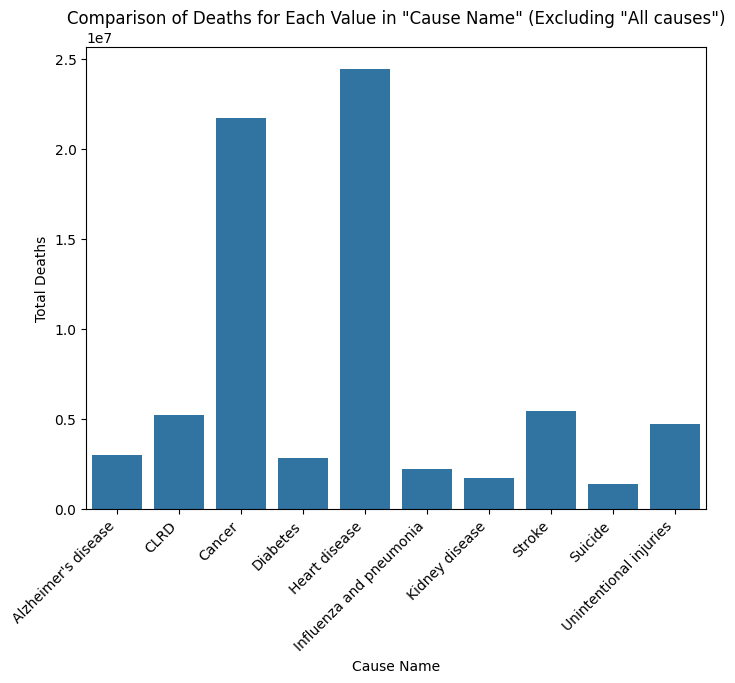

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in csv
df = pd.read_csv('/content/drive/MyDrive/Personal/NCHS_-_Leading_Causes_of_Death__United_States.csv')

df.columns = df.columns.str.strip()

df.head()

# include numerical and objects from columns
numerical_features= df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# gets range for the numbers
numerical_range = {feature: (df[feature].min(), df[feature].max()) for feature in numerical_features}

# gets unique values for objects
categorical_values = {feature: df[feature].unique() for feature in categorical_features}

selected_column = 'Cause Name'
selected_value = 'CLRD'  # Replace with the actual value

# Output
for feature, value in numerical_range.items():
    print(f"Range for {feature}: Minimum = {value[0]}, Maximum = {value[1]}\n")

# Print unique values for the selected column
print(f"Unique values for {selected_column}: {df[selected_column].unique()}\n")



# Filter out "All causes"
filtered_df = df[df[selected_column] != 'All causes']

# Group by 'Cause Name' and sum 'Deaths' (using the filtered DataFrame)
cause_deaths = filtered_df.groupby(selected_column)['Deaths'].sum().reset_index()

# Create the bar plot using the aggregated data (using the filtered DataFrame)
plt.figure(figsize=(8, 6))
sns.barplot(x=selected_column, y='Deaths', data=cause_deaths)
plt.title(f'Comparison of Deaths for Each Value in "{selected_column}" (Excluding "All causes")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.ylabel('Total Deaths')  # Update y-axis label
plt.show()


In [30]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in excel
df = pd.read_excel('/content/drive/MyDrive/Personal/P_Data_Extract_From_World_Development_Indicators.xlsx')
df.columns = df.columns.str.strip()

df.head()

# include numerical and objects from columns
numerical_features= df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# gets range for the numbers
numerical_range = {feature: (df[feature].min(), df[feature].max()) for feature in numerical_features}

# gets unique values for objects
categorical_values = {feature: df[feature].unique() for feature in categorical_features}

selected_column = 'Country Name'
selected_value = 'United States'
filtered_df = df[df[selected_column] == selected_value]

# Output
for feature, value in numerical_range.items():
    print(f"Range for {feature}: Minimum = {value[0]}, Maximum = {value[1]}")

# Print unique values for the selected column
print(filtered_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                           Series Name        Series Code  \
206  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   

      Country Name Country Code 1990 [YR1990] 2000 [YR2000] 2014 [YR2014]  \
206  United States          USA     14.104067     12.756295      8.510127   

    2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
206      8.190742       7.40835      7.790406      7.822007      7.176021   

    2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023]  
206      7.814858            ..            ..            ..  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Range for Data Value: Minimum = 0.00, Maximum = 424.70, Average = 21.43


Unique values for Name: ['Boiler Emissions- Total SO2 Emissions' 'Fine particles (PM 2.5)'
 'Nitrogen dioxide (NO2)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled'
 'Respiratory hospitalizations due to PM2.5 (age 20+)' 'Ozone (O3)'
 'Asthma hospitalizations due to Ozone'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde'
 'Asthma emergency departments visits due to Ozone'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Cardiac and respiratory deaths due to Ozone' 'Deaths due to PM2.5'
 'Outdoor Air Toxics - Benzene' 'Annual vehicle miles traveled (trucks)'
 'Annual vehicle miles traveled (cars)']



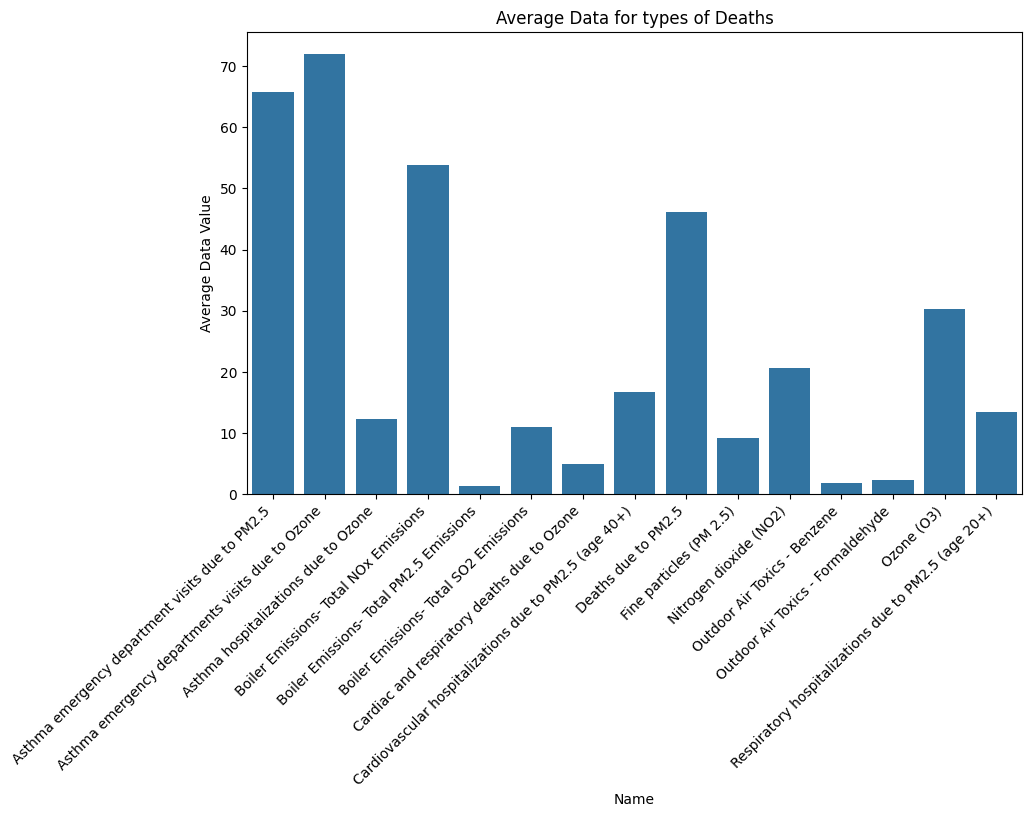

In [24]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Personal/Air_Quality.csv')

df.columns = df.columns.str.strip()

df.head()

# include numerical and objects from columns
numerical_features= df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# gets range for the numbers
numerical_range = {feature: (df[feature].min(), df[feature].max()) for feature in numerical_features}

# gets unique values for objects
categorical_values = {feature: df[feature].unique() for feature in categorical_features}

# prints numerical data Min, Max, Avg
if 'Data Value' in numerical_features:
    min_value, max_value = numerical_range['Data Value']
    avg_value = df['Data Value'].mean()  # Calculate average
    print(f"Range for Data Value: Minimum = {min_value:.2f}, Maximum = {max_value:.2f}, Average = {avg_value:.2f}")
print ('\n')

# prints type of Airborne Illness
if 'Name' in categorical_values:
    print(f"Unique values for Name: {categorical_values['Name']}\n")

# Calculate the average 'Data Value' for each 'Name' category, excluding "Annual Vehicle"
filtered_data = df[~df['Name'].isin(['Annual vehicle miles traveled', 'Annual vehicle miles traveled (cars)', 'Annual vehicle miles traveled (trucks)'])]
average_data_value = filtered_data.groupby('Name')['Data Value'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Name', y='Data Value', data=average_data_value)
plt.title('Average Data for types of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Name')
plt.ylabel('Average Data Value')
plt.show()